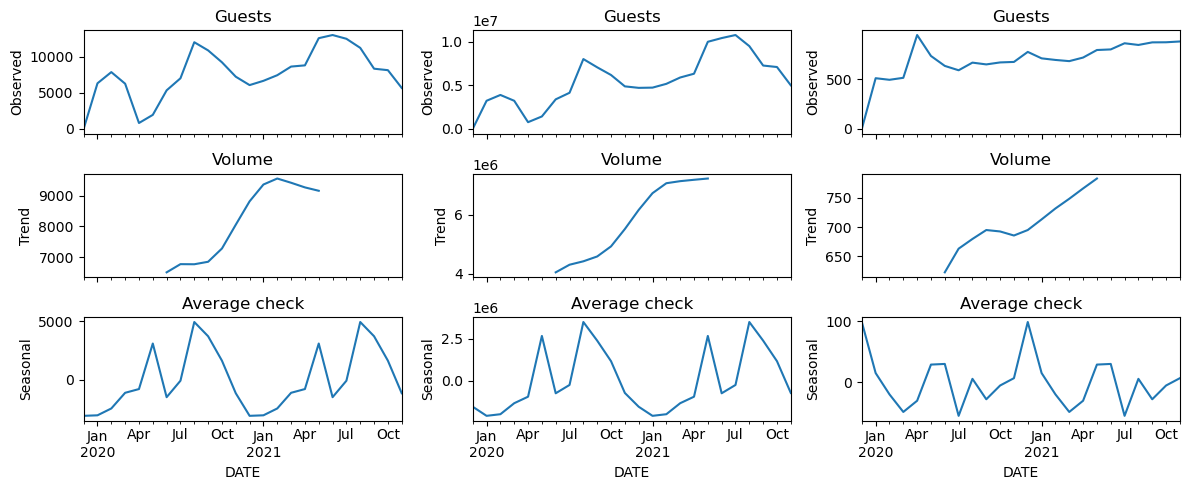

In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5


import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/opt/anaconda3/futuraplan.csv',index_col=0)
df.set_index([pd.to_datetime(df.index)], inplace=True)

guests = df['GUESTS']
vol = df['VOL']
check_av = df['AVCHECK']


res1 = sm.tsa.seasonal_decompose(guests.interpolate(), model='additive', freq=12)
res2 = sm.tsa.seasonal_decompose(vol.interpolate(), model='additive', freq=12)
res3 = sm.tsa.seasonal_decompose(check_av.interpolate(), model='additive', freq=12)

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')

    axes[0].set_title("Guests")
    axes[1].set_title("Volume")
    axes[2].set_title("Average check")
    

fig, axes = plt.subplots(ncols=3, nrows=3, sharex=True, figsize=(12,5))

plotseasonal(res1, axes[:,0])
plotseasonal(res2, axes[:,1])
plotseasonal(res3, axes[:,2])

fig.tight_layout()
plt.show()


ADF Statistic: -2.251602
p-value: 0.188053
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


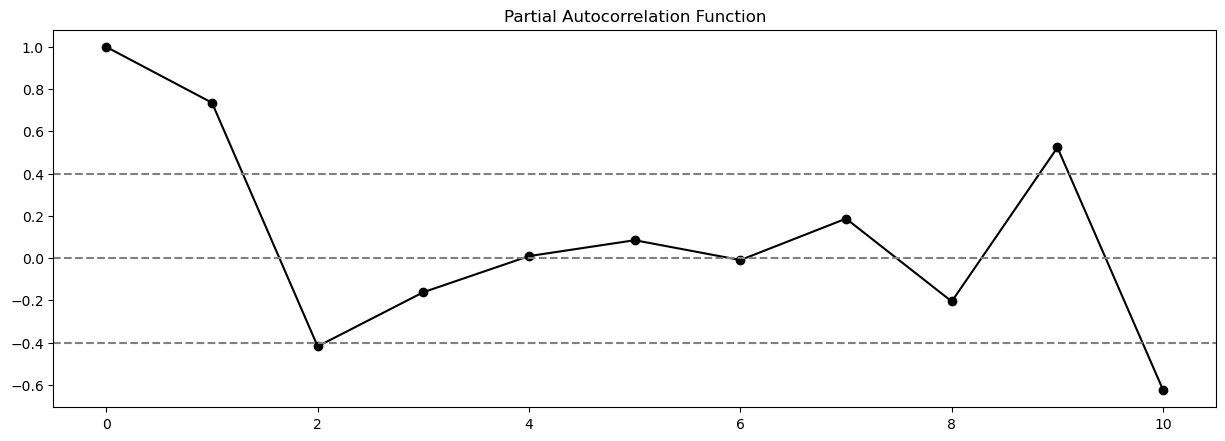

In [3]:
def df_test(ts):
    result = adfuller(ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
df_test(guests)
lag_pacf = pacf(guests, nlags=10)

#Plot PACF: 
plt.plot(lag_pacf, 'ok-')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(guests)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(guests)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function');


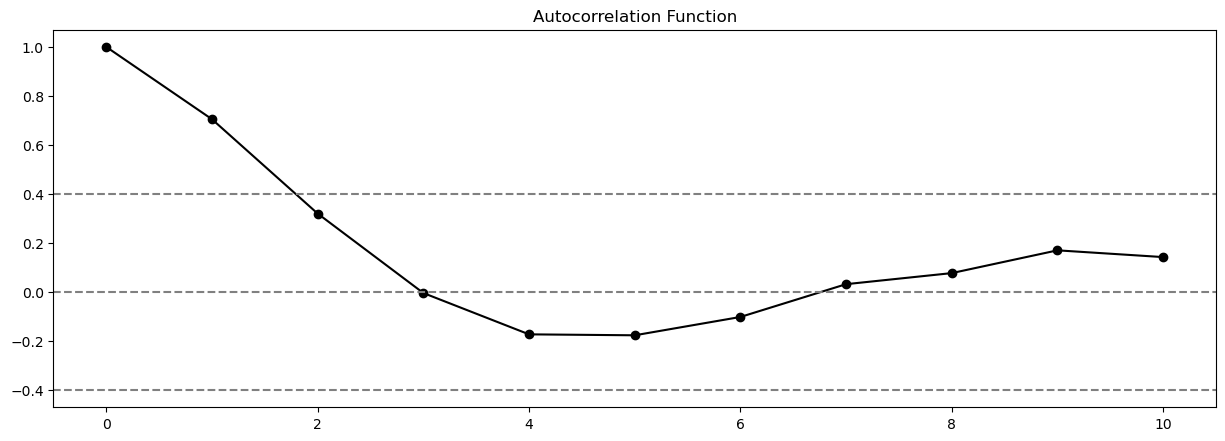

In [4]:
lag_acf = acf(guests, nlags=10)

#Plot ACF: 
plt.plot(lag_acf, 'ok-')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(guests)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(guests)),linestyle='--',color='gray')
plt.title('Autocorrelation Function');

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.30101D+00    |proj g|=  5.11058D-03

At iterate    5    f=  9.30095D+00    |proj g|=  1.80833D-04

At iterate   10    f=  9.30091D+00    |proj g|=  4.05951D-03

At iterate   15    f=  9.30016D+00    |proj g|=  7.27685D-03

At iterate   20    f=  9.30003D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   0.000D+00   9.300D+00
  F =   9.3000261072529540     

CONVERG

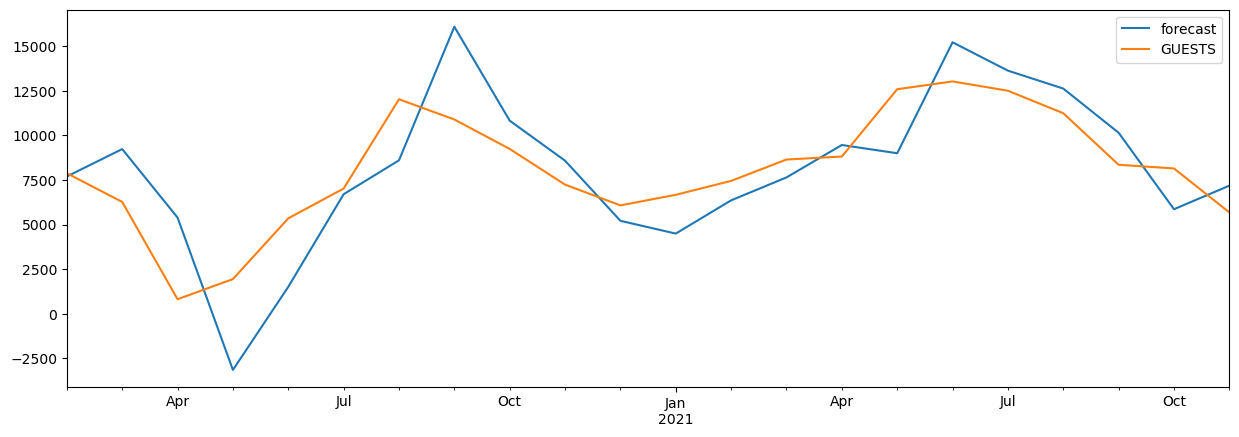

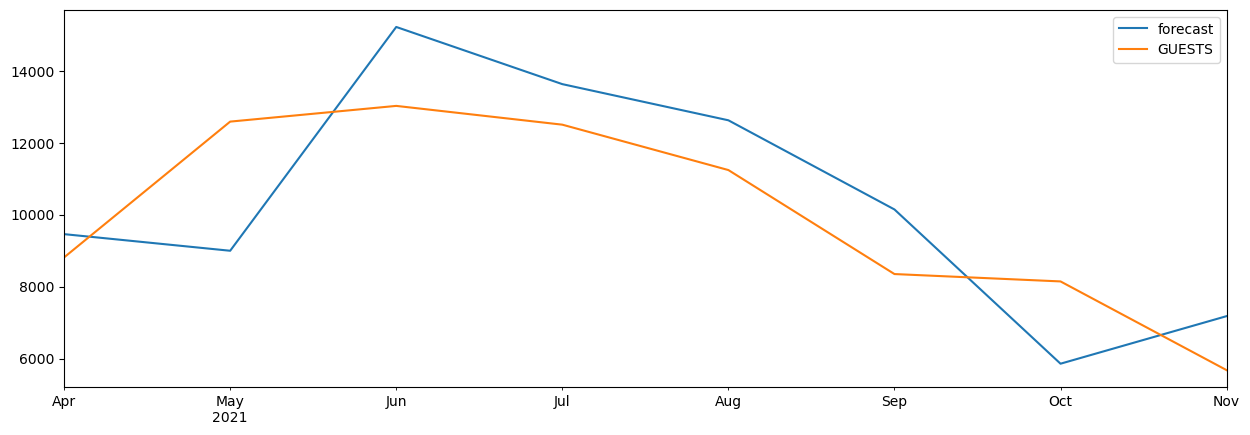

In [12]:
guests_model = ARIMA(guests, order=(2, 2, 0))
guests_fit = guests_model.fit()
# Actual vs Fitted
guests_fit.plot_predict(dynamic=False)
plt.show()
# only 2021 year
guests_fit.plot_predict(start="2021-04-30", dynamic=False)
plt.show()


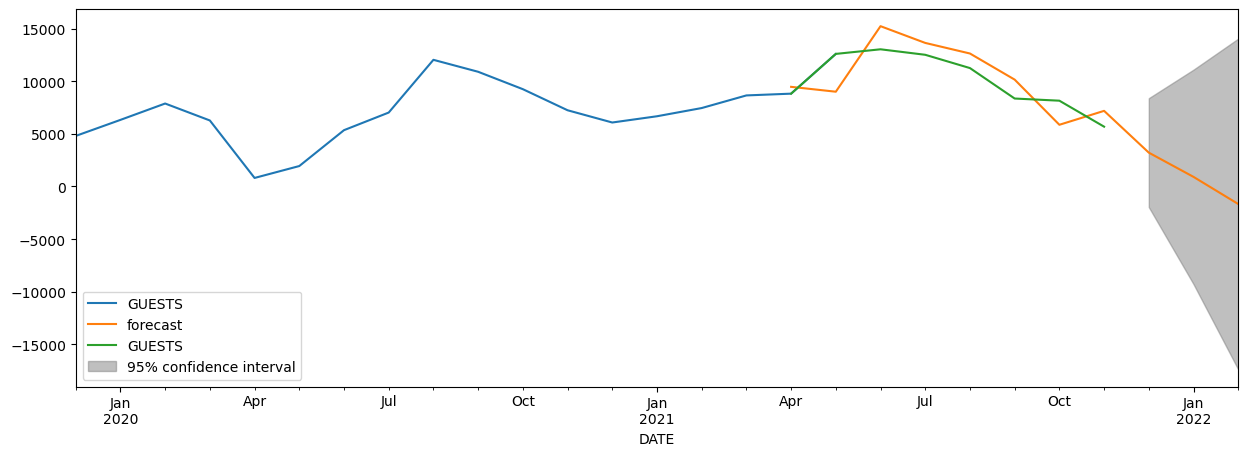

In [42]:
from sklearn.metrics import mean_squared_error

# Split data into train / test sets
train = guests.iloc[:len(guests)-6]
test = guests.iloc[len(guests)-8:] # set one year(12 months) for testing

fig, ax = plt.subplots()
ax = train.plot(ax=ax)
fig = guests_fit.plot_predict('2021-04-30', '2022-02-28', dynamic=False, ax=ax)
plt.show()
